## 1. Bar Plots

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from datasets import load_dataset
data = load_dataset('lukebarousse/data_jobs')
df = data['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list : ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [24]:
import seaborn as sns
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] =='Data Analyst')].copy()

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [4]:
df_DA_US = df_DA_US.explode('job_skills')
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])

In [5]:
df_DA_US_top_pay = df_DA_US_group.sort_values(by = 'median', ascending=False).head(10)
df_DA_US_top_pay
df_DA_US_top_skills = df_DA_US_group.sort_values(by = 'count', ascending=False).head(10).sort_values(by = 'median', ascending=False).head(10)
df_DA_US_top_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


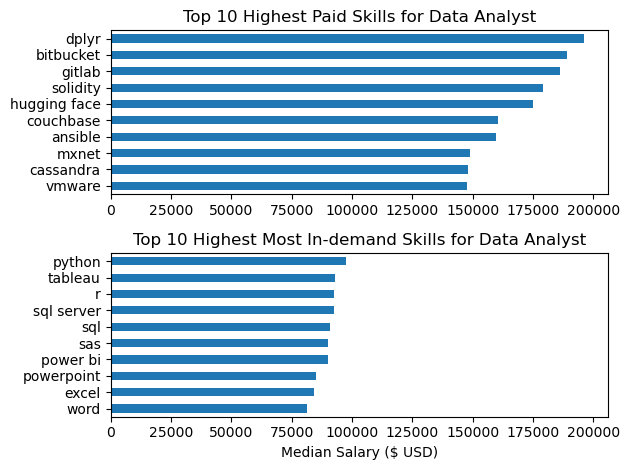

In [6]:
fig , ax = plt.subplots(2,1)

df_DA_US_top_pay.plot(kind='barh', y ='median', ax=ax[0], legend=False)
ax[0].invert_yaxis()
ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
df_DA_US_top_skills.plot(kind='barh', y ='median', ax=ax[1], legend=False)
ax[1].invert_yaxis()
ax[1].set_title('Top 10 Highest Most In-demand Skills for Data Analyst')
ax[1].set_xlabel('Median Salary ($ USD)')
ax[1].set_ylabel('')
ax[1].set_xlim(ax[0].get_xlim())
fig.tight_layout()

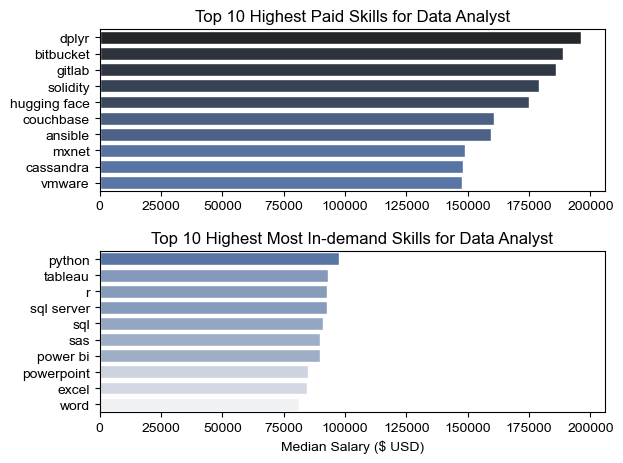

In [13]:
fig , ax = plt.subplots(2,1)
sns.set_theme(style='ticks')
#df_DA_US_top_pay.plot(kind='barh', y ='median', ax=ax[0], legend=False)
sns.barplot(data=df_DA_US_top_pay, x='median',y=df_DA_US_top_pay.index, ax=ax[0], hue='median', palette="dark:b_r", legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_xlabel('')
ax[0].set_ylabel('')

#df_DA_US_top_skills.plot(kind='barh', y ='median', ax=ax[1], legend=False)
sns.barplot(data=df_DA_US_top_skills, x='median',y=df_DA_US_top_skills.index, ax=ax[1], hue='median', palette="light:b", legend=False)
ax[1].set_title('Top 10 Highest Most In-demand Skills for Data Analyst')
ax[1].set_xlabel('Median Salary ($ USD)')
ax[1].set_ylabel('')
ax[1].set_xlim(ax[0].get_xlim())
fig.tight_layout()

# 2. Histogram

Text(12.444444444444445, 0.5, 'Number of Jobs')

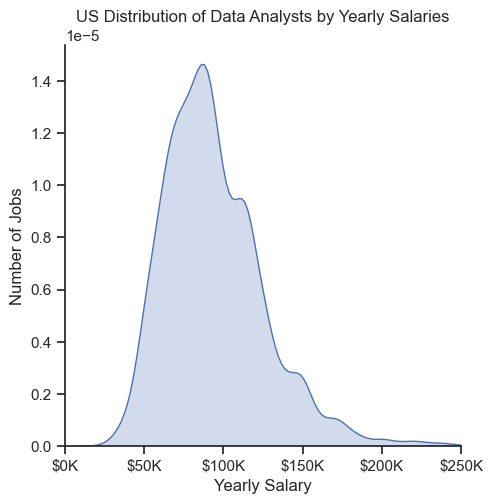

In [28]:
#df_DA_US['salary_year_avg'].plot(kind='hist', bins= 40, edgecolor='black')

sns.displot(df_DA_US['salary_year_avg'], kind='kde', fill=True)
plt.xlim(0,250000)

ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.title('US Distribution of Data Analysts by Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs') 

## 3. Boxplots

In [29]:
jobs_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']


df_US = df[(df['job_title_short'].isin(jobs_titles) ) & (df['job_country'] =='United States')].copy()


df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in jobs_titles]


Text(0, 0.5, 'Job Titles')

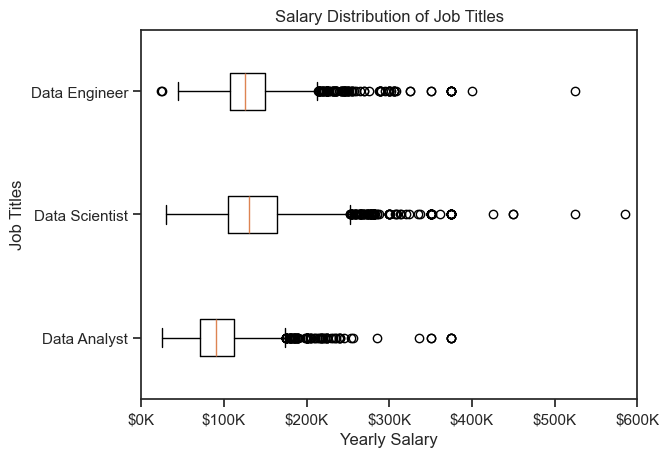

In [21]:
plt.boxplot(job_list, labels=jobs_titles , vert=False)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f'${int(x/1000)}K'))
plt.title('Salary Distribution of Job Titles')
plt.xlim(0,600000)
plt.xlabel('Yearly Salary')
plt.ylabel('Job Titles')

Text(0, 0.5, '')

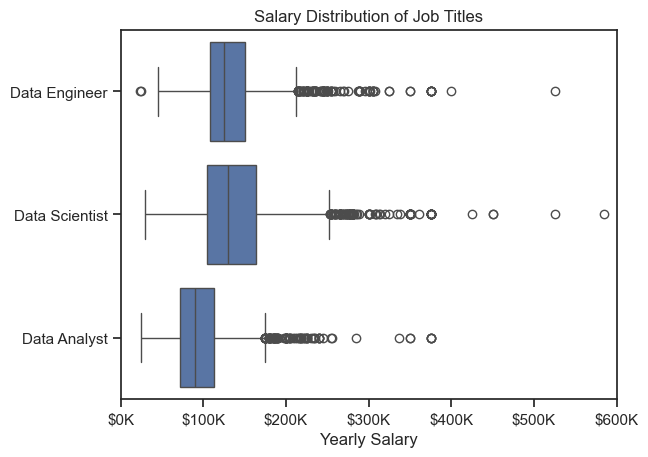

In [34]:
sns.boxplot(df_US, x='salary_year_avg', y='job_title_short')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f'${int(x/1000)}K'))
plt.title('Salary Distribution of Job Titles')
plt.xlim(0,600000)
plt.xlabel('Yearly Salary')
plt.ylabel('')